In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline



In [116]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

In [117]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [118]:
data.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


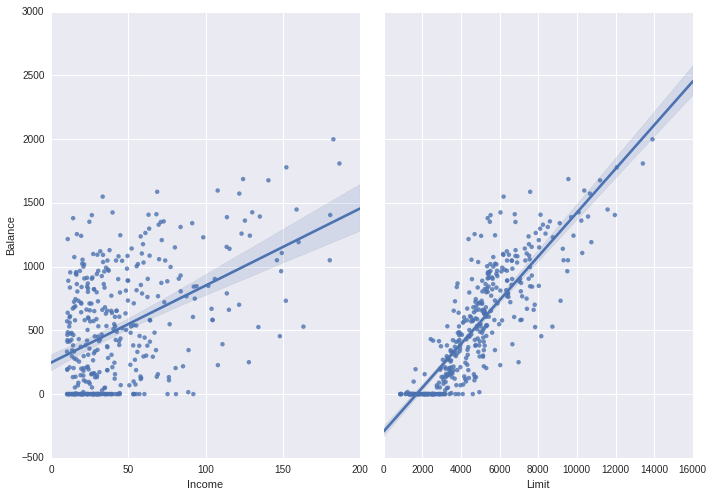

In [119]:
sns.pairplot(data, x_vars=['Income', 'Limit'], y_vars='Balance', size=7, aspect=0.7, kind='reg')

In [120]:
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']

In [121]:
#Lasso
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [122]:
n_lassos = 200
n_betas = 7
lassos = np.linspace(20,2000,n_lasso)
lassos

array([   20.        ,   124.21052632,   228.42105263,   332.63157895,
         436.84210526,   541.05263158,   645.26315789,   749.47368421,
         853.68421053,   957.89473684,  1062.10526316,  1166.31578947,
        1270.52631579,  1374.73684211,  1478.94736842,  1583.15789474,
        1687.36842105,  1791.57894737,  1895.78947368,  2000.        ])

In [123]:
betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lasso):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_train, Y_train)
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_train, Y_train)
    # Score Training
    R2_test[i] = clf.score(X_test, Y_test)
lassos.shape
R2_test.shape

(200,)

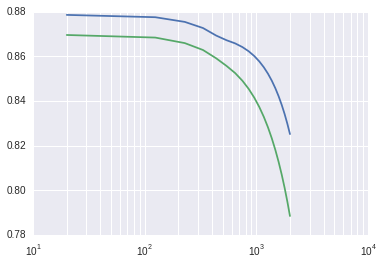

In [148]:
plt.semilogx(lassos,R2)
plt.semilogx(lassos,R2_t)

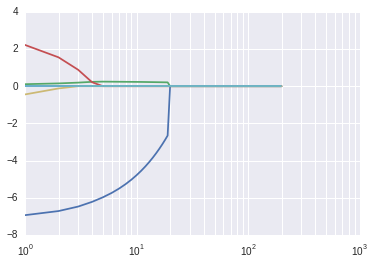

In [125]:
plt.semilogx(betas[:,1:])

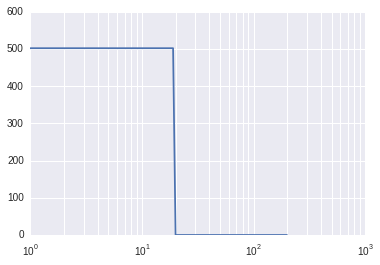

In [151]:
plt.semilogx(betas[:,0])

In [171]:
scaler1 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler1.transform(X_test)
Y_test = (Y_test - np.mean(Y_test))/np.std(Y_test)
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
Y_train = (Y_train - np.mean(Y_train))/np.std(Y_train)

betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lasso):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_train, Y_train)
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_train, Y_train)
    # Score Training
    R2_test[i] = clf.score(X_test, Y_test)
    
np.mean(Y_train)

5.5511151231257827e-17

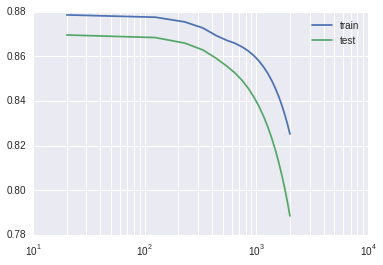

In [181]:
plt.semilogx(lassos,R2,label='train')
plt.semilogx(lassos,R2_t,label='test')
plt.legend()

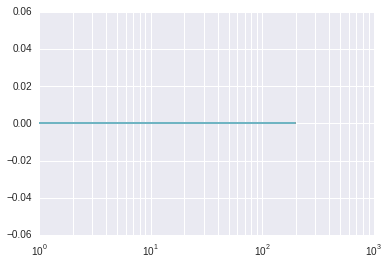

In [182]:
plt.semilogx(betas[:,1:])

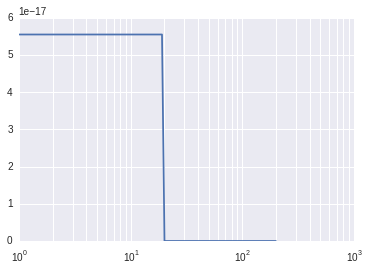

In [174]:
plt.semilogx(betas[:,0])